In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# import seaborn as sns
# import csv

In [149]:
contests = pd.read_csv('data/Contests.csv')
# print(contests.head())

### CSV

In [150]:
timeDF = pd.read_csv('data/WPI/2017-09.csv', header=None)
timeDF.columns = ['ContestId', 'MinutesRemaining', 'Entries']
targetIDs = timeDF.ContestId.unique()[:]

### Limiter

In [151]:
targetIDs = targetIDs[:5]

### Help Functions

In [152]:
def contestThreshold(id):
    aContest = getContestData(id)
    return float(aContest.TopPrize/aContest.EntryFeeAmount)

In [153]:
def getContestData(id):
    return contests.loc[contests['ContestId'] == id]

In [154]:
def totalTime():
    return timeDF['MinutesRemaining'].min(), timeDF['MinutesRemaining'].max()

### First Graphs

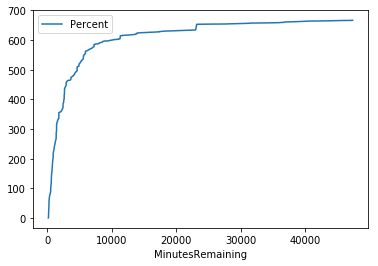

In [155]:
for id in targetIDs[:1]:
    contestTimeDF = timeDF.loc[timeDF['ContestId']==id] 
    threshold = contestThreshold(id)

    #Cumulitive sum of entries
    contestTimeDF = contestTimeDF.assign(TotalEntries = contestTimeDF['Entries'].cumsum())
    #Percent of goal
    contestTimeDF = contestTimeDF.assign(Percent = lambda x: 100*(contestTimeDF.TotalEntries)/threshold)
    contestTimeDF.plot(x='MinutesRemaining', y='Percent', kind='line')


### Combining Graphs

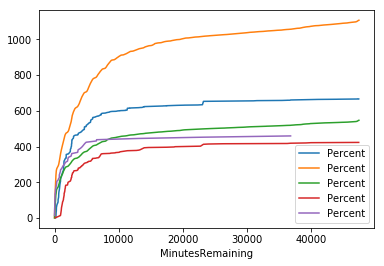

In [156]:
fig, ax = plt.subplots()

for id in targetIDs:
    contestTimeDF = timeDF.loc[timeDF['ContestId']==id] 
    threshold = contestThreshold(id)

    #Cumulitive sum of entries
    contestTimeDF = contestTimeDF.assign(TotalEntries = contestTimeDF['Entries'].cumsum())
    #Percent of goal
    contestTimeDF = contestTimeDF.assign(Percent = lambda x: 100*(contestTimeDF.TotalEntries)/threshold)
    
    contestTimeDF.groupby('ContestId').plot(ax = ax, x='MinutesRemaining', y='Percent', kind='line')

### Adding Threshold Bar

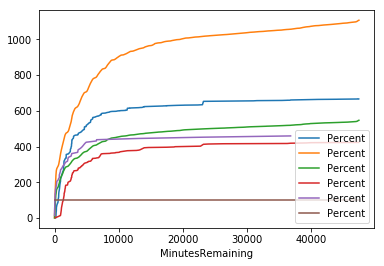

In [157]:
fig, ax = plt.subplots()

for id in targetIDs:
    contestTimeDF = timeDF.loc[timeDF['ContestId']==id] 
    threshold = contestThreshold(id)

    #Cumulitive sum of entries
    contestTimeDF = contestTimeDF.assign(TotalEntries = contestTimeDF['Entries'].cumsum())
    #Percent of goal
    contestTimeDF = contestTimeDF.assign(Percent = lambda x: 100*(contestTimeDF.TotalEntries)/threshold)
    
    contestTimeDF.groupby('ContestId').plot(ax = ax, x='MinutesRemaining', y='Percent', kind='line')

start, end = totalTime()
d = {'Percent': [100, 100], 'MinutesRemaining': [start, end]}
thresholdLine = pd.DataFrame(data=d)
thresholdLine.plot(ax=ax, x='MinutesRemaining', y='Percent')